In [29]:
# import importlib
import itertools

from visualizers import *
import kd_tree
# importlib.reload()

inp_points = []




<IPython.core.display.Javascript object>


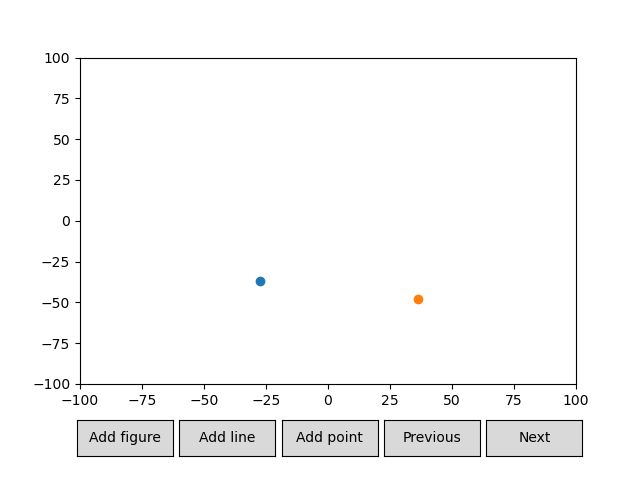

(-100.0, 100.0)

In [30]:

%matplotlib notebook

input_plot = Plot()
input_plot.draw()
ax = plt.gca()
ax.set_xlim((-100, 100))
ax.set_ylim((-100, 100))

In [31]:
print(input_plot.get_added_points())
inp_points = [*inp_points, *itertools.chain(*map(lambda coll: coll.points, input_plot.get_added_points()))]
print(inp_points)


[<visualizers.PointsCollection object at 0x7efc68694e20>, <visualizers.PointsCollection object at 0x7efc686945b0>]
[(-27.457157258064512, -37.09788602941177), (36.252520161290306, -48.12729779411765)]
